In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt

import missingno

In [62]:
data = pd.read_pickle('../pickles/MN8_clean_training_data')

In [63]:
nphi_data = pd.read_pickle('../pickles/MN8_model_training_data')

In [64]:
nphi_data.describe()

,VSHALE,RHOB_COMBINED,DTC,RDEP,TVD,NPHI,PEF,BAAT GP.,BOKNFJORD GP.,CROMER KNOLL GP.,...,HEGRE GP.,NORDLAND GP.,ROGALAND GP.,ROTLIEGENDES GP.,SHETLAND GP.,TYNE GP.,VESTLAND GP.,VIKING GP.,ZECHSTEIN GP.,FORCE_2020_LITHOFACIES_LITHOLOGY
count,1.170511e+06,1.170511e+06,1.089648e+06,1.159496e+06,1.170511e+06,7.654090e+05,6.716920e+05,1.170511e+06,1.170511e+06,1.170511e+06,...,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06
mean,7.886616e-16,5.623585e-16,2.277810e-15,6.990858e-17,-1.662794e-16,-1.839406e-15,-4.531099e-16,3.060458e-02,2.669774e-03,4.469843e-02,...,1.188626e-02,9.524900e-02,1.127234e-01,2.385283e-03,1.999366e-01,1.029465e-03,2.231162e-02,1.127704e-01,1.045526e-02,1.953153e+00
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000001e+00,1.000001e+00,1.722439e-01,5.160086e-02,2.066410e-01,...,1.083743e-01,2.935587e-01,3.162545e-01,4.878110e-02,3.999526e-01,3.206877e-02,1.476951e-01,3.163121e-01,1.017151e-01,1.541950e+00
min,-1.602987e+00,-7.012255e+00,-3.532553e+00,-9.354556e-02,-2.060766e+00,-2.818677e+00,-5.677591e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-8.068039e-01,-6.867329e-01,-8.513449e-01,-8.583555e-02,-7.689429e-01,-6.943523e-01,-2.651927e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,-6.116305e-02,2.225317e-01,-1.258040e-01,-8.119519e-02,-9.640332e-02,-3.958801e-02,-1.831241e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
75%,8.103266e-01,7.073019e-01,9.141693e-01,-7.138176e-02,6.957359e-01,6.973020e-01,-3.203230e-02,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00
max,1.766938e+00,5.105272e+00,6.906218e+00,1.745706e+01,3.347322e+00,5.116431e+00,3.439509e+01,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01


In [68]:
modellingdata = nphi_data.loc[:,['RHOB_COMBINED', 'RDEP', 'DTC', 'VSHALE']]

In [69]:
modellingdata['NPHI'] = data['NPHI']

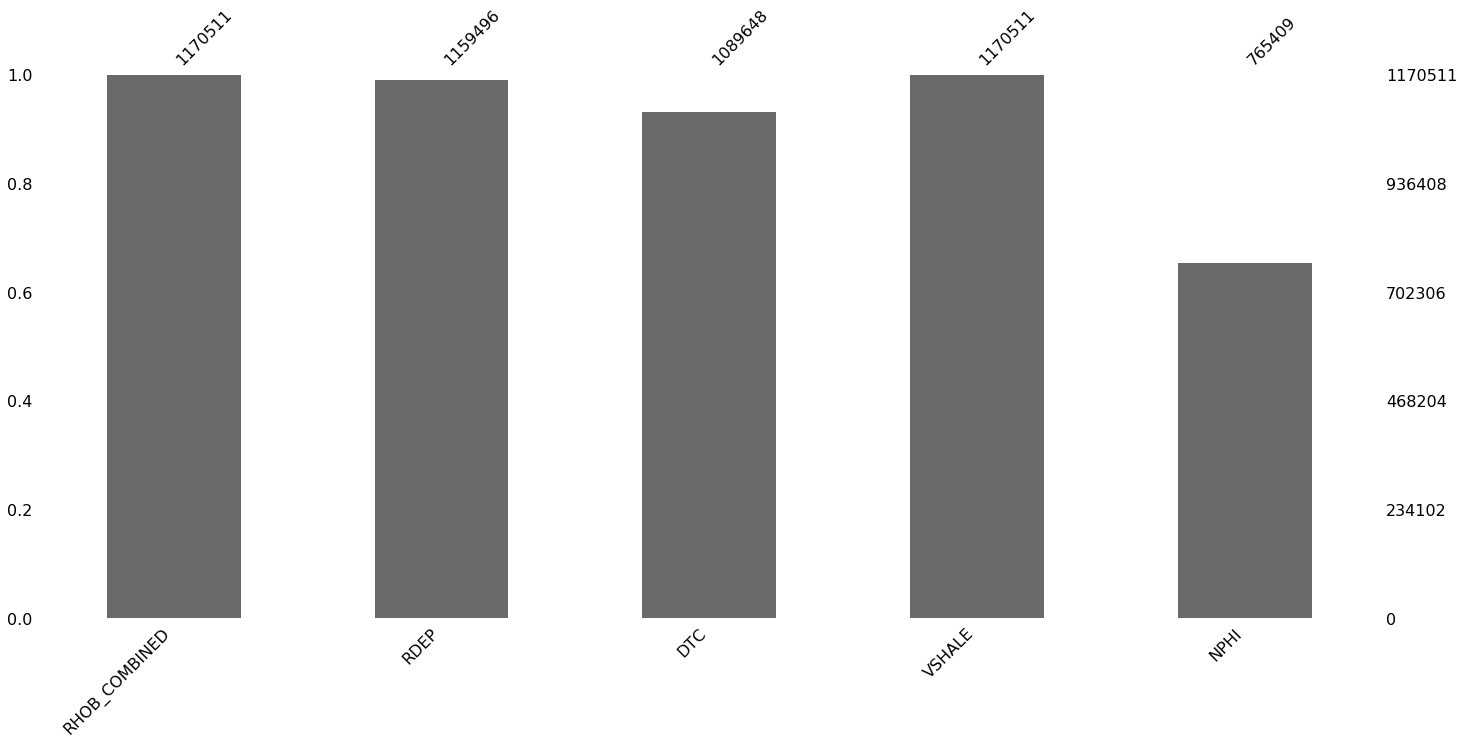

In [70]:
missingno.bar(modellingdata)

In [71]:
modellingdata.describe()

,RHOB_COMBINED,RDEP,DTC,VSHALE,NPHI
count,1.170511e+06,1.159496e+06,1.089648e+06,1.170511e+06,765409.000000
mean,5.623585e-16,6.990858e-17,2.277810e-15,7.886616e-16,0.331966
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.130483
min,-7.012255e+00,-9.354556e-02,-3.532553e+00,-1.602987e+00,-0.035822
25%,-6.867329e-01,-8.583555e-02,-8.513449e-01,-8.068039e-01,0.241365
50%,2.225317e-01,-8.119519e-02,-1.258040e-01,-6.116305e-02,0.326800
75%,7.073019e-01,-7.138176e-02,9.141693e-01,8.103266e-01,0.422951
max,5.105272e+00,1.745706e+01,6.906218e+00,1.766938e+00,0.999570


In [72]:
modellingdata.dropna(inplace=True)

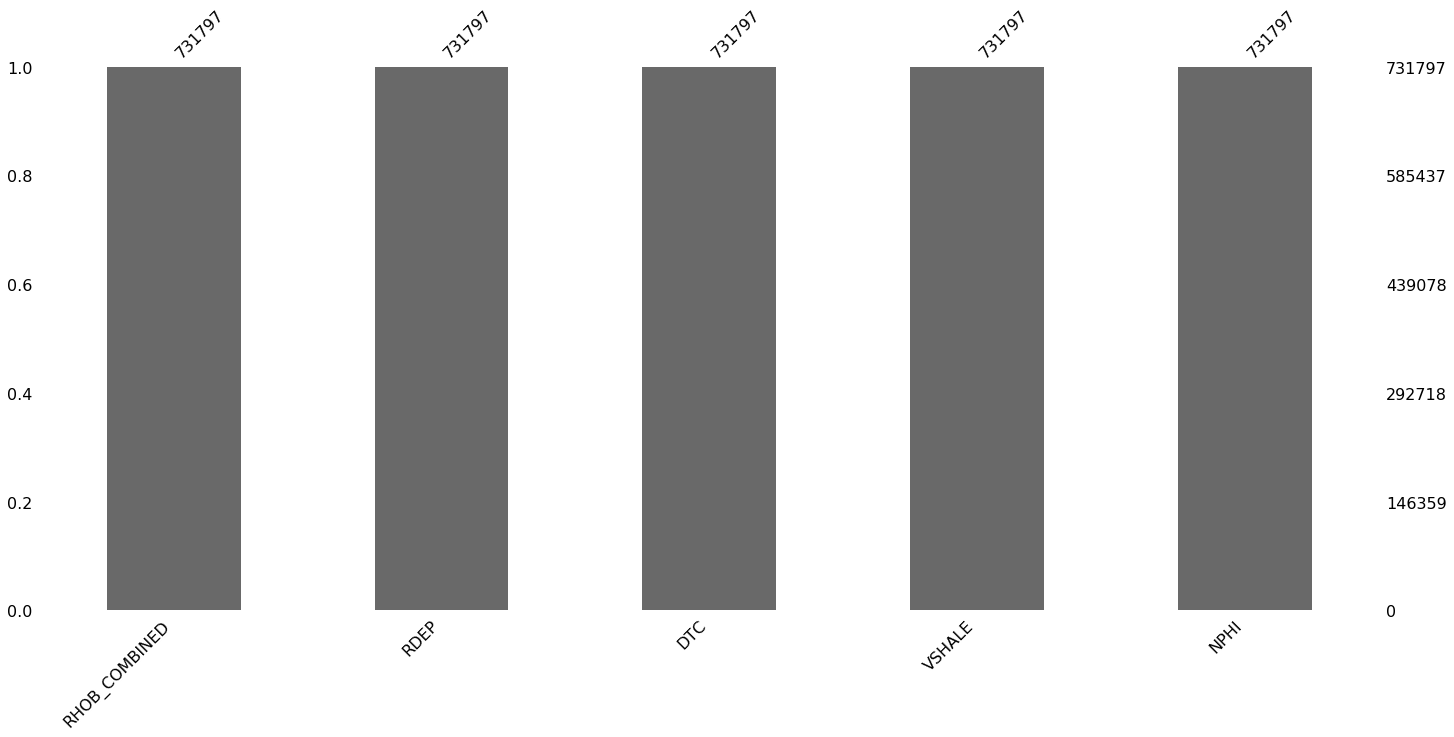

In [78]:
missingno.bar(modellingdata)

In [74]:
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor

In [75]:
X = modellingdata.loc[:,['VSHALE', 'RHOB_COMBINED', 'TVD','DTC']]
y = modellingdata.loc[:,'NPHI']

In [ ]:
missingno

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
model_LR=LinearRegression()
model_LR.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [19]:
y_pred_LR_test = model_LR.predict(X_test)

(-5, 5)

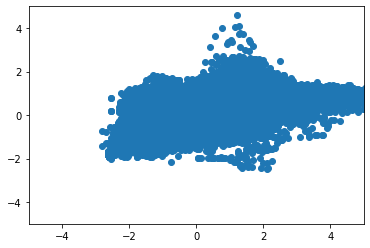

In [41]:
plt.scatter(y_test, y_pred_LR_test)
plt.xlim(-5,5)
plt.ylim(-5,5)

In [22]:
model_RFR = RandomForestRegressor(max_depth=200)
model_RFR.fit(X_train, y_train)

C:\Users\BANAMZ\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [23]:
y_pred_RFR_test = model_RFR.predict(X_test)

(-5, 5)

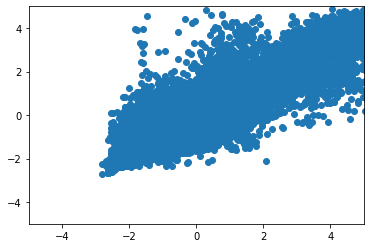

In [40]:
plt.scatter(y_test, y_pred_RFR_test)
plt.xlim(-5,5)
plt.ylim(-5,5)